# 다중 회귀를 이용한 첫번째 모델



In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('/content/drive/MyDrive/영화 관객 수 예측/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/영화 관객 수 예측/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/영화 관객 수 예측/submission.csv')

In [86]:
print(train.shape, test.shape)

(600, 12) (243, 11)


title : 영화의 제목  

distributor : 배급사  

genre : 장르  

release_time : 개봉일  

time : 상영시간(분)  

screening_rat : 상영등급  

director : 감독이름  

dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)  

dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)  

num_staff : 스텝수  

num_actor : 주연배우수  

box_off_num : 관객수


## 데이터 전처리

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [88]:
train.head() # 감독의 이전 작품의 수가 0이라면 평균 관객 수가 결측값인지 확인 필요

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [89]:
train.loc[train['dir_prev_num']==0] # 이전 작품 수가 0이면 평균 관객 수가 Nan값인 것을 알 수 있음. => 0으로 대체

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [90]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [91]:
print(train.isnull().sum(), test.isnull().sum()) # 결측값 대체 완료

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64 title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64


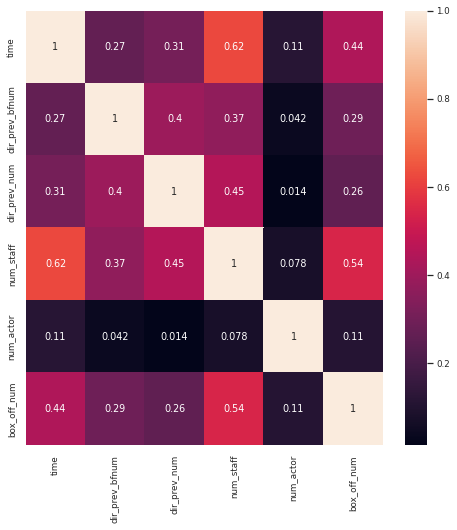

In [92]:
# 각 실수형 피쳐들의 상관관계 파악을 위한 heatmap 시각화
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

In [93]:
# 범주형 데이터 삭제 또는 대체를 위한 탐색 (상식적인 선에서)
print(train['genre'].value_counts())
print(test['genre'].value_counts())
# train과 test의 장르 종류 수가 같음 => 숫자 레이블로 변경하여 활용

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64
드라마       78
멜로/로맨스    39
다큐멘터리     33
코미디       23
액션        21
공포        19
느와르       12
애니메이션      8
미스터리       7
서스펜스       1
뮤지컬        1
SF         1
Name: genre, dtype: int64


In [94]:
print(train['screening_rat'].value_counts())
print(test['screening_rat'].value_counts())
# 상영등급 또한 활용

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64
청소년 관람불가    93
15세 관람가     73
12세 관람가     40
전체 관람가      37
Name: screening_rat, dtype: int64


In [95]:
print(train['distributor'].value_counts())
print(test['distributor'].value_counts())
# 배급사는 삭제

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64
CJ 엔터테인먼트          31
롯데엔터테인먼트           24
(주)마운틴픽쳐스          14
(주)쇼박스             12
골든타이드픽처스           12
                   ..
웃기씨네                1
오픈유컬쳐               1
CJ E&M Pictures     1
크리에이티브컴즈(주)         1
(주)씨타마운틴픽쳐스         1
Name: distributor, Length: 93, dtype: int64


In [96]:
print(train['director'].value_counts())
print(test['director'].value_counts())
# 감독 또한 삭제
# title, release_time은 당연히 다를 것이기에 삭제

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64
조성규    3
이정호    3
김형준    2
김태균    2
김미연    2
      ..
최진성    1
김대승    1
임태형    1
박흥식    1
이전     1
Name: director, Length: 220, dtype: int64


In [97]:
train.drop(['title', 'distributor', 'director', 'release_time'], axis=1, inplace=True)
test.drop(['title', 'distributor', 'director', 'release_time'], axis=1, inplace=True)

In [98]:
train.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,액션,96,청소년 관람불가,0.00,0,91,2,23398
1,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501
2,액션,123,15세 관람가,220775.25,4,343,4,6959083
3,코미디,101,전체 관람가,23894.00,2,20,6,217866
4,코미디,108,15세 관람가,1.00,1,251,2,483387


In [99]:
test.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,느와르,125,청소년 관람불가,3.005290e+05,2,304,3
1,멜로/로맨스,113,12세 관람가,3.427002e+05,4,275,3
2,드라마,115,12세 관람가,4.206611e+06,3,419,7
3,액션,116,15세 관람가,6.913420e+05,2,408,2
4,공포,110,15세 관람가,3.173800e+04,1,380,1


In [100]:
# 장르와 상영시간을 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
for col in ['genre', 'screening_rat']:
  encoder = LabelEncoder()
  train[col] = encoder.fit_transform(train[col])
  test[col] = encoder.transform(test[col]) # train데이터의 범주로 훈련시킨 그대로 test에 적용

In [101]:
train.loc[:, ['genre', 'screening_rat']].head()

,genre,screening_rat
0,10,3
1,2,3
2,10,1
3,11,2
4,11,1


In [102]:
test.loc[:, ['genre', 'screening_rat']].head()

,genre,screening_rat
0,2,3
1,5,0
2,4,0
3,10,1
4,1,1


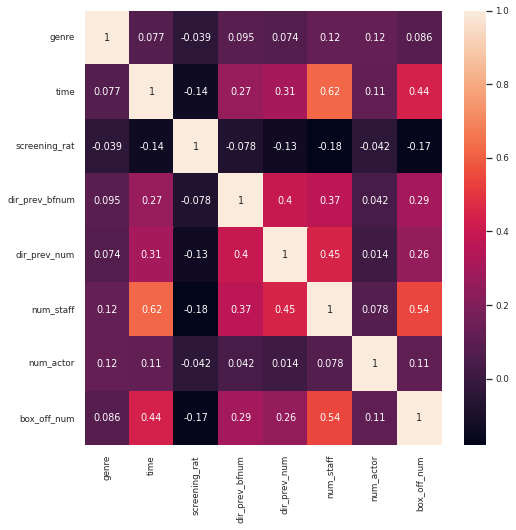

In [103]:
# 장르와 상영등급을 포함한 피쳐간의 상관관계 분석
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()
# 첫번째 모델에서는 장르와 상영등급을 피쳐에 포함

In [105]:
# 학습데이터와 정답데이터 구분 

features = ['genre', 'time', 'screening_rat', 'dir_prev_bfnum',	'dir_prev_num',	'num_staff', 'num_actor']
target = train[['box_off_num']]
train = train[features]

In [108]:
# 피쳐 엔지니어링
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(train)
train_poly = poly.transform(train)
print(train_poly.shape)

(600, 36)


In [111]:
test_poly = poly.transform(test)
print(test_poly.shape)

(243, 36)


## 모델학습

In [112]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, target)
print(lr.score(train_poly, target))

0.4766852453357231


In [113]:
pred = lr.predict(test_poly)

In [114]:
submission['box_off_num'] = pred
submission
# 음의 값도 포함된 것을 알 수 있다.

,title,box_off_num
0,용서는 없다,1.500775e+06
1,아빠가 여자를 좋아해,3.798083e+05
2,하모니,3.644497e+06
3,의형제,1.985831e+06
4,평행 이론,1.847439e+06
...,...,...
238,해에게서 소년에게,1.503161e+05
239,울보 권투부,-2.878258e+05
240,어떤살인,4.331470e+05
241,말하지 못한 비밀,3.380748e+05


In [115]:
submission.to_csv('first_model.csv', index=False) # 점수 : 22927866.985105164	